In [1]:
import pandas as pd
import numpy as np

In [26]:
# amazon_data = pd.read_excel("amazonLabelled.xlsx")
twitter_Data = pd.read_csv("dataset.csv",
                           encoding="latin1",
                           names = ["sentiment", "id", "date", "query", "username", "tweet"])

In [27]:
twitter_Data

,sentiment,id,date,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [35]:
twitter_Data.tweet[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [30]:
import seaborn as sns

In [37]:
np.unique(twitter_Data.sentiment, return_counts=True)

(array([0, 4]), array([800000, 800000]))

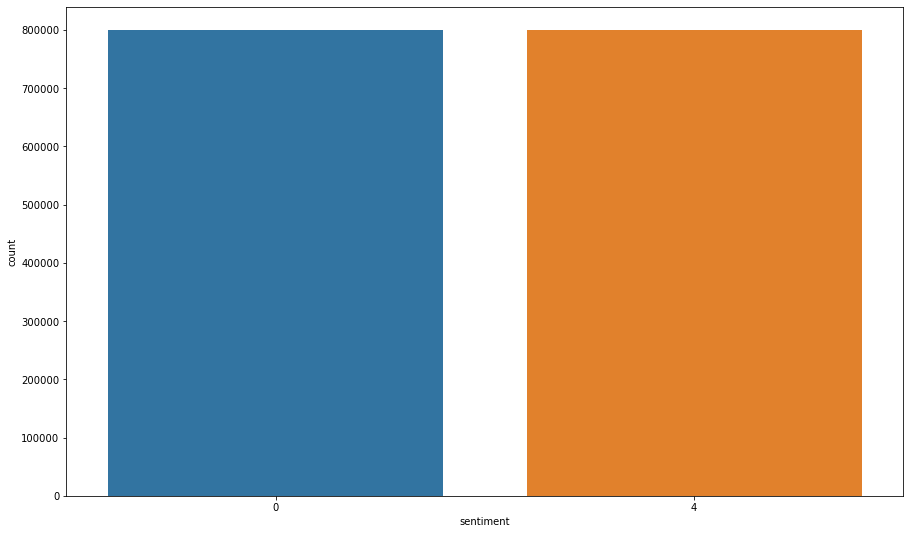

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 9))
sns.countplot(x = twitter_Data.sentiment)
plt.show()

In [24]:
# Loading the Dataset
amazon_data = pd.read_excel("amazonLabelled.xlsx")

In [25]:
amazon_data.head()

,S,Feedback,Sentiment
0,1.0,"Good case, Excellent value.",Positive
1,2.0,Great for the jawbone.,Positive
2,3.0,Tied to charger for conversations lasting more...,Negative
3,4.0,The mic is great.,Positive
4,5.0,I have to jiggle the plug to get it to line up...,Negative


In [28]:
amazon_data.drop("S", axis = 1, inplace = True)

In [29]:
amazon_data

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative
...,...,...
994,The screen does get smudged easily because it ...,Negative
995,What a piece of junk.. I lose more calls on th...,Negative
996,Item Does Not Match Picture.,Negative
997,The only thing that disappoint me is the infra...,Negative


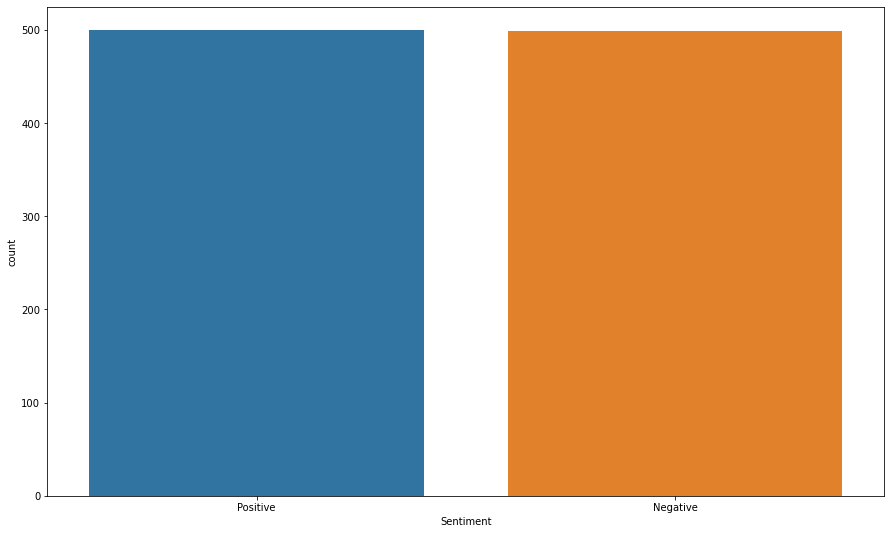

In [49]:
plt.figure(figsize = (15, 9))
sns.countplot(x = amazon_data.Sentiment)
plt.show()

In [50]:
np.unique(amazon_data.Sentiment, return_counts=True)

(array(['Negative', 'Positive'], dtype=object), array([499, 500]))

In [39]:
## Sentiment Analysis using nltk library!
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harshitdawar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [44]:
# Creating a Sentiment Analyzer Object
analyzer = SentimentIntensityAnalyzer()

In [48]:
# Getting the sentiments automatically

print(analyzer.polarity_scores(amazon_data.Feedback[0]))
print(analyzer.polarity_scores(amazon_data.Feedback[2]))
print(analyzer.polarity_scores(amazon_data.Feedback[998]))

{'neg': 0.0, 'neu': 0.1, 'pos': 0.9, 'compound': 0.8402}
{'neg': 0.287, 'neu': 0.713, 'pos': 0.0, 'compound': -0.6145}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [55]:
positive = []
negative = []
neutral = []
compound = []

for review_index in range(amazon_data.shape[0]):
    score = analyzer.polarity_scores(amazon_data.Feedback[review_index])
    positive.append(score["pos"])
    negative.append(score["neg"])
    neutral.append(score["neu"])
    compound.append(score["compound"])

In [57]:
np.mean(np.array(positive)), np.mean(np.array(negative)), np.mean(np.array(neutral)), np.mean(np.array(compound))

(0.20306806806806807,
 0.10502402402402404,
 0.6919149149149149,
 0.13783373373373373)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
encoder = LabelEncoder()
    
amazon_data.Sentiment = encoder.fit_transform(amazon_data.Sentiment)

In [60]:
amazon_data

,Feedback,Sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
994,The screen does get smudged easily because it ...,0
995,What a piece of junk.. I lose more calls on th...,0
996,Item Does Not Match Picture.,0
997,The only thing that disappoint me is the infra...,0


In [61]:
encoder.classes_

array(['Negative', 'Positive'], dtype=object)

In [63]:
encoder.inverse_transform([0])

array(['Negative'], dtype=object)

In [65]:
import spacy
English_Model = spacy.load("en_core_web_sm", disable = ["ner", "parser"])

In [247]:
def ProcessData(review):
    review = English_Model(review)
    
    temp = []
    
    for token in review:
#         if not token.is_stop and not token.is_punct and not token.is_space and not token.like_num:
        if not token.is_stop and not (token.is_punct or token.is_space or token.like_num):
            temp.append(token.lemma_.lower())
            
    return " ".join(word for word in temp)

In [248]:
ProcessData(amazon_data.Feedback[0])

'good case excellent value'

In [249]:
ProcessData(amazon_data.Feedback[2])

'tied charger conversation last minute major problem'

In [250]:
amazon_data.Feedback[2]

'tied charger conversations lasting minutes major problems'

In [251]:
amazon_data.Feedback = amazon_data.Feedback.apply(ProcessData)

In [252]:
amazon_data

,Feedback,Sentiment
0,good case excellent value,1
1,great jawbone,1
2,tied charger conversation last minute major pr...,0
3,mic great,1
4,jiggle plug line right decent volume,0
...,...,...
994,screen smudge easily touch ear face,0
995,piece junk lose call phone,0
996,item match picture,0
997,thing disappoint infra red port irda,0


In [253]:
Reviews = amazon_data.Feedback.values

In [254]:
type(Reviews)

numpy.ndarray

In [255]:
Reviews.shape

(999,)

In [256]:
Reviews[:5]

array(['good case excellent value', 'great jawbone',
       'tied charger conversation last minute major problem', 'mic great',
       'jiggle plug line right decent volume'], dtype=object)

In [257]:
Sentiments = amazon_data.Sentiment.values

In [258]:
Sentiments[:5]

array([1, 1, 0, 1, 0])

In [259]:
positive = []
negative = []
neutral = []
compound = []

for review_index in range(Reviews.shape[0]):
    score = analyzer.polarity_scores(Reviews[review_index])
    positive.append(score["pos"])
    negative.append(score["neg"])
    neutral.append(score["neu"])
    compound.append(score["compound"])

In [260]:
np.mean(np.array(positive)), np.mean(np.array(negative)), np.mean(np.array(neutral)), np.mean(np.array(compound))

(0.31553153153153146,
 0.14762162162162165,
 0.5358458458458459,
 0.16595915915915918)

In [261]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train, x_test, y_train, y_test = train_test_split(Reviews, Sentiments, random_state = 5, test_size = 0.25)

In [264]:
x_train.shape, y_train.shape

((749,), (749,))

In [265]:
x_train[0], y_train[0]

('work', 1)

In [266]:
Reviews[0]

'good case excellent value'

In [267]:
cv = CountVectorizer()
tfidfvec = TfidfVectorizer()

In [268]:
cv_sentences = cv.fit_transform(x_train)
tfidf_sentences = tfidfvec.fit_transform(x_train)

In [269]:
cv_sentences

<749x1130 sparse matrix of type '<class 'numpy.int64'>'
	with 3318 stored elements in Compressed Sparse Row format>

In [270]:
tfidf_sentences

<749x1130 sparse matrix of type '<class 'numpy.float64'>'
	with 3318 stored elements in Compressed Sparse Row format>

In [271]:
cv_sentences.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [272]:
tfidf_sentences.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [273]:
cv_sentences_test = cv.transform(x_test)
tfidf_sentences_test = tfidfvec.transform(x_test)

In [274]:
cv_sentences_test

<250x1130 sparse matrix of type '<class 'numpy.int64'>'
	with 858 stored elements in Compressed Sparse Row format>

In [275]:
tfidf_sentences_test

<250x1130 sparse matrix of type '<class 'numpy.float64'>'
	with 858 stored elements in Compressed Sparse Row format>

In [276]:
cv_sentences_test.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [277]:
tfidf_sentences_test.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [278]:
np.unique(tfidf_sentences_test.toarray()[101])

array([0.        , 0.35204313, 0.42915983, 0.48510183, 0.67569496])

In [279]:
np.unique(cv_sentences_test.toarray()[101])

array([0, 1, 2])

## Model Implementation!

In [280]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()

In [281]:
RFC.fit(cv_sentences, y_train)
DTC.fit(cv_sentences, y_train)
GBC.fit(cv_sentences, y_train)
ABC.fit(cv_sentences, y_train)

AdaBoostClassifier()

In [282]:
RFC.classes_

array([0, 1])

In [283]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [284]:
y_pred_RFC = RFC.predict(cv_sentences_test)
y_pred_DTC = DTC.predict(cv_sentences_test)
y_pred_GBC = GBC.predict(cv_sentences_test)
y_pred_ABC = ABC.predict(cv_sentences_test)

In [285]:
cv_acuuracy_scores = {
                        "Random Forest" : accuracy_score(y_test, y_pred_RFC),
                        "Decision Tree" : accuracy_score(y_test, y_pred_DTC),
                        "Gradient Boosting" : accuracy_score(y_test, y_pred_GBC),
                        "Ada Boost" : accuracy_score(y_test, y_pred_ABC)
                     }

In [286]:
cv_acuuracy_scores

{'Random Forest': 0.756,
 'Decision Tree': 0.716,
 'Gradient Boosting': 0.776,
 'Ada Boost': 0.772}

In [300]:
cv_accuracy_scores_DF = pd.DataFrame(
                                     cv_final_data,
                                     columns = ["Algorithm", "Accuracy Scores"],
                                    )

In [295]:
algos = list(cv_acuuracy_scores.keys())
ac_values = list(cv_acuuracy_scores.values())

In [296]:
algos = np.array(algos)
ac_values = np.array(ac_values)

In [298]:
cv_final_data = np.hstack((algos, ac_values))

In [299]:
cv_final_data.shape

(4, 2)

In [297]:
algos = algos.reshape(4, 1)
ac_values = ac_values.reshape(4, 1)

In [292]:
ac_values[0][0]

0.756

In [301]:
cv_accuracy_scores_DF["Accuracy Scores"] = cv_accuracy_scores_DF["Accuracy Scores"].map(lambda x: float(x))

In [302]:
cv_accuracy_scores_DF

,Algorithm,Accuracy Scores
0,Random Forest,0.756
1,Decision Tree,0.716
2,Gradient Boosting,0.776
3,Ada Boost,0.772


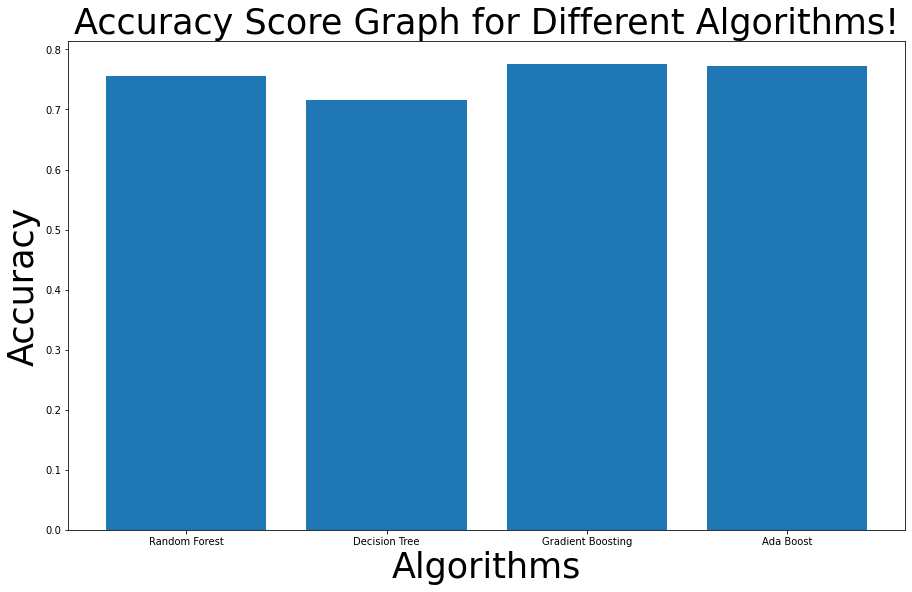

In [303]:
plt.figure(figsize = (15, 9))
plt.bar(x = cv_accuracy_scores_DF.Algorithm, height = cv_accuracy_scores_DF["Accuracy Scores"])
# plt.ylim(0, 1)
plt.xlabel("Algorithms", fontsize = 35)
plt.ylabel("Accuracy", fontsize = 35)
plt.title("Accuracy Score Graph for Different Algorithms!", fontsize = 35)
plt.show()

In [304]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74       132
           1       0.70      0.85      0.77       118

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.75       250



In [305]:
print(classification_report(y_test, y_pred_ABC))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       132
           1       0.82      0.66      0.73       118

    accuracy                           0.77       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.78      0.77      0.77       250



In [306]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       132
           1       0.84      0.65      0.73       118

    accuracy                           0.78       250
   macro avg       0.79      0.77      0.77       250
weighted avg       0.79      0.78      0.77       250



In [307]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       132
           1       0.66      0.81      0.73       118

    accuracy                           0.72       250
   macro avg       0.73      0.72      0.72       250
weighted avg       0.73      0.72      0.71       250



In [308]:
dtc_cf = confusion_matrix(y_test, y_pred_DTC)

In [309]:
abc_cf = confusion_matrix(y_test, y_pred_ABC)

In [310]:
gbc_cf = confusion_matrix(y_test, y_pred_GBC)

In [311]:
rfc_cf = confusion_matrix(y_test, y_pred_RFC)

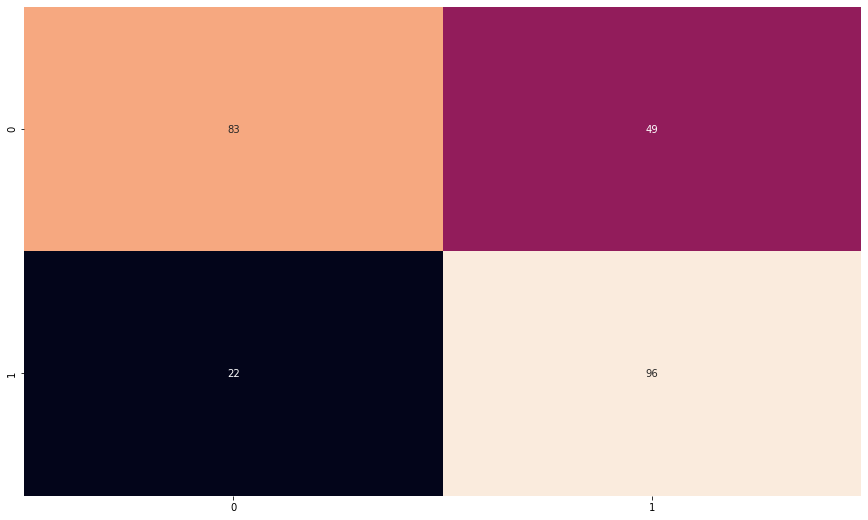

In [312]:
plt.figure(figsize = (15, 9))
sns.heatmap(dtc_cf, annot = True, cbar = False)
plt.show()

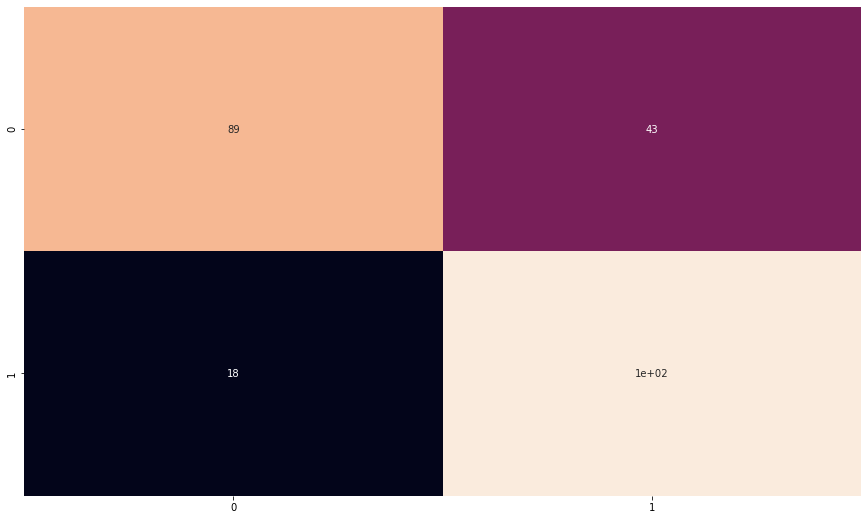

In [313]:
plt.figure(figsize = (15, 9))
sns.heatmap(rfc_cf, annot = True, cbar = False)
plt.show()

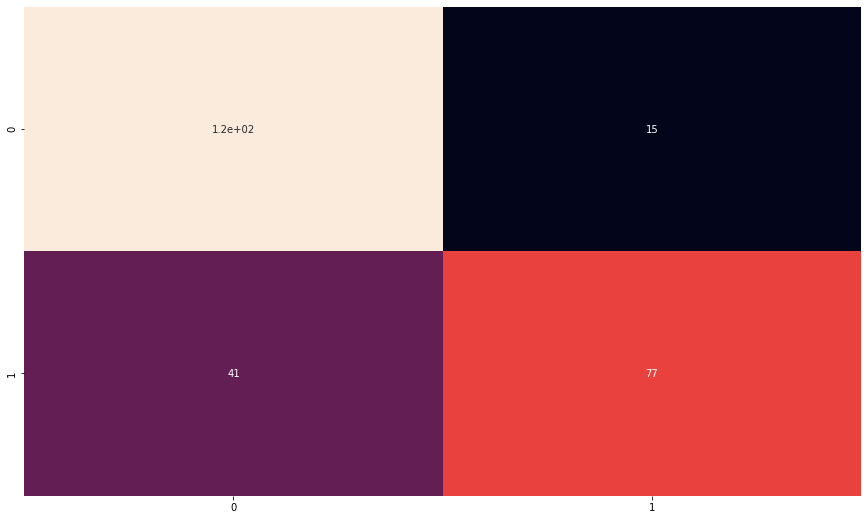

In [314]:
plt.figure(figsize = (15, 9))
sns.heatmap(gbc_cf, annot = True, cbar = False)
plt.show()

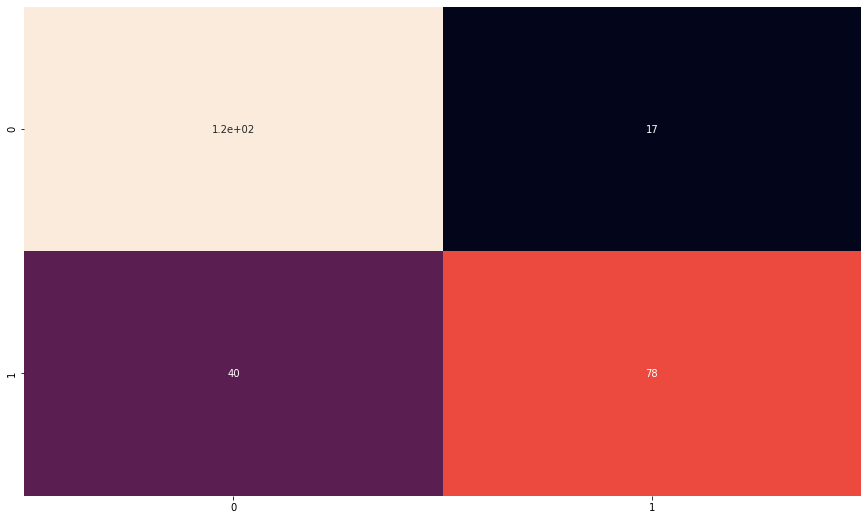

In [315]:
plt.figure(figsize = (15, 9))
sns.heatmap(abc_cf, annot = True, cbar = False)
plt.show()

## Topic Modelling

In [316]:
from sklearn.decomposition import LatentDirichletAllocation # (LDA)

In [317]:
cv_sentences

<749x1130 sparse matrix of type '<class 'numpy.int64'>'
	with 3318 stored elements in Compressed Sparse Row format>

In [318]:
LDA = LatentDirichletAllocation(n_components = 5)

In [319]:
LDA.fit(cv_sentences)

LatentDirichletAllocation(n_components=5)

In [330]:
cv.get_feature_names()

['10',
 '2mp',
 '42',
 '700w',
 'abhor',
 'ability',
 'able',
 'abound',
 'absolutel',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessory',
 'accessoryone',
 'accidentally',
 'accompany',
 'accord',
 'activate',
 'activesync',
 'actually',
 'ad',
 'adapter',
 'add',
 'addition',
 'additional',
 'address',
 'adhesive',
 'adorable',
 'advertise',
 'advise',
 'aggravate',
 'ago',
 'alarm',
 'allot',
 'allow',
 'alot',
 'amazed',
 'amazing',
 'amazon',
 'ample',
 'angle',
 'answer',
 'ant',
 'antena',
 'anti',
 'apartment',
 'apparently',
 'appeal',
 'appear',
 'applifie',
 'area',
 'argue',
 'armband',
 'arrival',
 'arrive',
 'asia',
 'ask',
 'aspect',
 'assume',
 'att',
 'attractive',
 'audio',
 'auto',
 'available',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'background',
 'backlight',
 'bad',
 'balance',
 'bar',
 'barely',
 'bargain',
 'basement',
 'basic',
 'basically',
 'battery',
 'be',
 'beat',
 'beautiful',
 'bed',
 'beep',
 'belt

In [322]:
LDA.components_.shape

(5, 1130)

In [321]:
LDA.components_[0]

array([0.20000518, 0.20000755, 0.20000587, ..., 1.18815775, 0.20000689,
       0.20000943])

In [323]:
LDA.components_[0].argsort()

array([ 881, 1010,  958, ...,  745,  573,  876])

In [326]:
LDA.components_[0][881], LDA.components_[0][876]

(0.2000023466543037, 19.197354159379508)

In [327]:
np.min(LDA.components_[0]), np.max(LDA.components_[0])

(0.2000023466543037, 19.197354159379508)

In [342]:
most_dominant_words_index = LDA.components_[1].argsort()[-20 : ]

In [343]:
for index in most_dominant_words_index:
    print(cv.get_feature_names()[index])

look
plug
try
buy
battery
sound
time
nice
charger
happy
headset
well
quality
fit
ear
price
phone
work
good
great


In [336]:
transformed_sentences_TM_prob = LDA.transform(cv_sentences)

In [337]:
transformed_sentences_TM_prob.shape

(749, 5)

In [339]:
cv_sentences.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [341]:
transformed_sentences_TM_prob[0].argmax()

1

In [344]:
x_train

array(['work', 'like loud buzzing override conversation phone',
       'be satisfy', 'text messaging feature tricky use', 'pleased',
       'easy turn car volume control accessable', 'wear', 'want', 'waste',
       'read review problem', 'read spec make wow',
       'needless waste money',
       'utterly confuse cause lose couple important contact',
       'amazed quick arrival original lg cell phone battery fraction price',
       'good hope', 'love look feel samsung flipphone',
       'loudspeaker option great bumper light appeal',
       'microphone work accord people call applifie',
       'frog phone charm adorable eye catch',
       'colleague great reception little expensive performance great',
       'warning stay away', 'unreliable service t mobile', 'great phone',
       'buy product', 'get well well numerous palm', 'hear garbage audio',
       'screen smudge easily touch ear face',
       'basically throw money window', 'piece junk lose call phone',
       'comfortable', 'h

In [345]:
df = pd.DataFrame(x_train, columns = ["Review"])

In [349]:
df["Topic"] = transformed_sentences_TM_prob.argmax(axis = 1)

In [351]:
df.Topic = df.Topic.apply(lambda x: x + 1)

In [353]:
df

,Review,Topic
0,work,2
1,like loud buzzing override conversation phone,5
2,be satisfy,3
3,text messaging feature tricky use,3
4,pleased,1
...,...,...
744,prompt service,1
745,setup simple,5
746,come strong light use light camera shot flash ...,5
747,nearly year work great,2
